In [2]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

In [4]:
data = pd.read_csv("breast-cancer-data.csv",header=0)# here header 0 means the 0 th row is our coloumn 
                                                # header in data

In [5]:
# have a look at the data
print(data.head(2))# as u can see our data have imported and having 33 columns
# head is used for to see top 5 by default I used 2 so it will print 2 rows
# If we will use print(data.tail(2))# it will print last 2 rows in data

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33            184.6      2019.0            0.1622   
1     ...               23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0              

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
# now we can drop this column Unnamed: 32
data.drop("Unnamed: 32",axis=1,inplace=True) # in this process this will change in our data itself 
# if you want to save your old data then you can use below code
# data1=data.drop("Unnamed:32",axis=1)
# here axis 1 means we are droping the column

In [8]:
# here you can check the column has been droped
data.columns # this gives the column name which are persent in our data no Unnamed: 32 is not now there

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
# like this we also don't want the Id column for our analysis
data.drop("id",axis=1,inplace=True)

In [10]:
# As I said above the data can be divided into three parts.lets divied the features according to their category
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:20])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [11]:
# lets now start with features_mean 
# now as ou know our diagnosis column is a object type so we can map it to integer value
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [12]:
data.describe() # this will describe the all statistical function of our data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


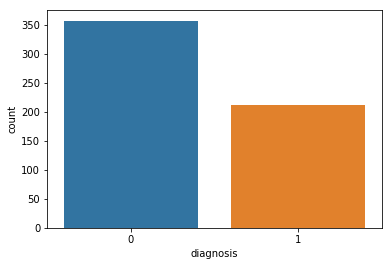

In [13]:
# lets get the frequency of cancer stages
sns.countplot(data['diagnosis'],label="Count")

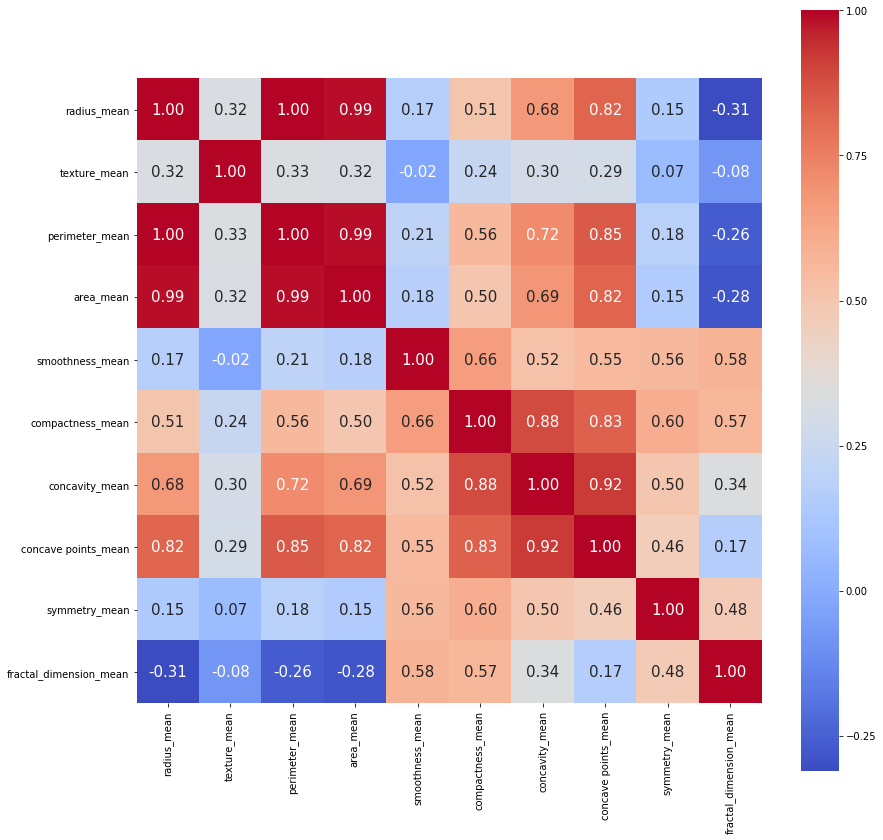

In [14]:
# now lets draw a correlation graph so that we can remove multi colinearity it means the columns are
# dependenig on each other so we should avoid it because what is the use of using same column twice
# lets check the correlation between features
# now we will do this analysis only for features_mean then we will do for others and will see who is doing best
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') # for more on heatmap you can visit Link(http://seaborn.pydata.org/generated/seaborn.heatmap.html)

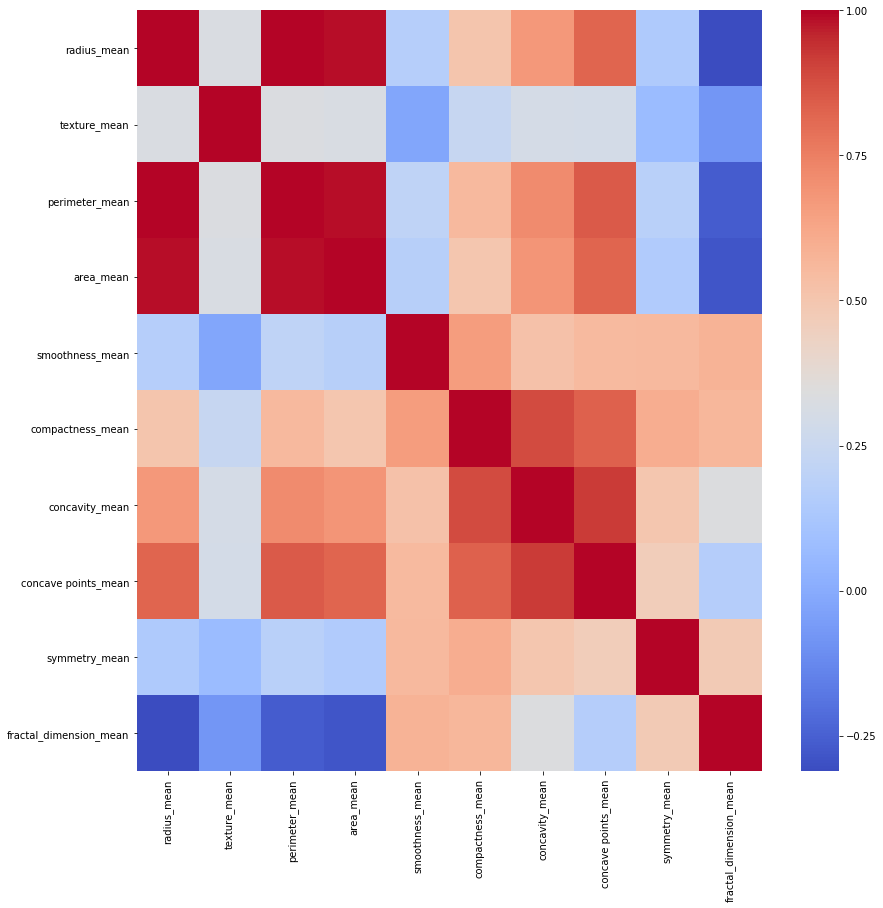

In [15]:
# now lets draw a correlation graph so that we can remove multi colinearity it means the columns are
# dependenig on each other so we should avoid it because what is the use of using same column twice
# lets check the correlation between features
# now we will do this analysis only for features_mean then we will do for others and will see who is doing best
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') # for more on heatmap you can visit Link(http://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [16]:
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
# now these are the variables which will use for prediction

In [17]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [18]:
train_X = train[prediction_var]# taking the training data input 
train_y=train.diagnosis# This is output of our training data
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test dat

In [19]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model

In [20]:
model.fit(train_X,train_y)# now fit our model for traiing data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of dignosis column for test inputs

In [22]:
metrics.accuracy_score(prediction,test_y) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.935672514619883

In [23]:
prediction_var = features_mean # taking all features

In [24]:
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [25]:
model=RandomForestClassifier(n_estimators=1000)

In [26]:
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.accuracy_score(prediction,test_y)

0.9473684210526315

In [27]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
gbm = xgb.XGBClassifier(
    learning_rate = 0.005,
 n_estimators= 1000,
 max_depth= 7,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(train_X, train_y)

In [28]:
predictions = gbm.predict(test_X)
metrics.accuracy_score(predictions,test_y)

NameError: name 'gbm' is not defined

In [29]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 
# of the features used

concave points_mean       0.263563
concavity_mean            0.174478
area_mean                 0.150710
radius_mean               0.123588
perimeter_mean            0.117530
texture_mean              0.059503
compactness_mean          0.044493
smoothness_mean           0.027491
fractal_dimension_mean    0.019403
symmetry_mean             0.019242
dtype: float64


In [30]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

In [31]:
ntrain = train.shape[0]
ntest = test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)
# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

TypeError: __init__() got an unexpected keyword argument 'n_folds'

In [32]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te) # predicted output on partishned train data.
        oof_test_skf[i, :] = clf.predict(x_test)  # predicted output on actual test data.

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [33]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 10,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':1500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 1500,
    'learning_rate' : 0.07
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 1500,
     #'max_features': 0.2,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [34]:
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=0, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=0, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=0, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=0, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=0, params=svc_params)

NameError: name 'SklearnHelper' is not defined

In [35]:
train_X= train[prediction_var].values
train_y= train.diagnosis.ravel()
test_X = test[prediction_var].values
test_y = test.diagnosis

In [36]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, train_X, train_y, test_X) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,train_X, train_y, test_X) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, train_X, train_y, test_X) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,train_X, train_y, test_X) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,train_X, train_y, test_X) # Support Vector Classifier

print("Training is complete")

NameError: name 'et' is not defined

In [50]:
x_train_stack = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test_stack = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test), axis=1)

In [52]:
gbm = xgb.XGBClassifier(
    learning_rate = 0.005,
 n_estimators= 300,
 max_depth= 7,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train_stack, train_y)

In [53]:
predictions = gbm.predict(x_test_stack)

In [54]:
print(metrics.accuracy_score(predictions, test_y))
# metrics.accuracy_score(predictions,test_y)

0.923976608187


In [57]:
import lightgbm as lgb

In [58]:
train_data=lgb.Dataset(train_X,label=train_y)

In [59]:
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']

In [60]:
num_round=50
# start=datetime.now()
lgbm=lgb.train(param,train_data,num_round)
# stop=datetime.now()

In [61]:
ypred2=lgbm.predict(test_X)

In [62]:
metrics.accuracy_score(ypred2, test_y)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [63]:
ypred2 = ypred2.apply(lambda x: 0 if x < 0.5 else 1)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [73]:
ypred2 = np.array(ypred2)

In [77]:
ypred2.shape

(171,)

In [79]:
for i in range(171):
    if ypred2[i] > 0.5:
        ypred2[i] = 1
    else:
        ypred2[i] = 0

In [80]:
ypred2

array([ 1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.])

In [81]:
metrics.accuracy_score(ypred2, test_y)

0.88888888888888884

In [82]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model

In [83]:
model.fit(train_X,train_y)# now fit our model for traiing data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
pre = model.predict(test_X)

In [85]:
metrics.accuracy_score(pre, test_y)

0.93567251461988299

In [86]:
# As we are going to use many models lets make a function
# Which we can use with different models
def classification_model(model,data,prediction_input,output):
    # here the model means the model 
    # data is used for the data 
    #prediction_input means the inputs used for prediction
    # output mean the value which are to be predicted
    # here we will try to find out the Accuarcy of model by using same data for fiiting and 
    #comparison for same data
    #Fit the model:
    model.fit(data[prediction_input],data[output]) #Here we fit the model using training set
  
    #Make predictions on training set:
    predictions = model.predict(data[prediction_input])
  
    #Print accuracy
    # now checkin accuracy for same data
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(data.shape[0], n_folds=5)
    # About cross validitaion please follow this link
    #https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/
    #let me explain a little bit data.shape[0] means number of rows in data
    #n_folds is for number of folds
    error = []
    for train, test in kf:
        # as the data is divided into train and test using KFold
        # now as explained above we have fit many models 
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# in this iloc is used for index of trainig data
        # here iloc[train,:] means all row in train in kf amd the all columns
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train
        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)
    
        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [87]:
model = DecisionTreeClassifier()
prediction_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var= "diagnosis"
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 84.211%
Cross-Validation Score : 85.965%
Cross-Validation Score : 87.427%
Cross-Validation Score : 89.035%
Cross-Validation Score : 89.458%


In [88]:
# same here cross validation scores are not good
# now move to RandomForestclassifier
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 85.965%
Cross-Validation Score : 88.596%
Cross-Validation Score : 90.643%
Cross-Validation Score : 91.886%
Cross-Validation Score : 91.916%


In [89]:
# cross validation score are also not bed
# so Random forest is good
# lets try with logistic regression
model=LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 89.279%
Cross-Validation Score : 78.070%
Cross-Validation Score : 82.018%
Cross-Validation Score : 86.550%
Cross-Validation Score : 87.939%
Cross-Validation Score : 89.112%


In [90]:
data_X= data[prediction_var]
data_y= data["diagnosis"]

In [91]:
# lets Make a function for Grid Search CV
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    # this is how we use grid serch CV we are giving our model
    # the we gave parameters those we want to tune
    # Cv is for cross validation
    # scoring means to score the classifier
    
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")
    # this will gie us our best parameter to use
    print(clf.best_params_)
    print("the bset estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
    # this is the best score that we can achieve using these parameters#
    print(clf.best_score_)

In [92]:
# Here we have to take parameters that are used for Decison tree Classifier
# you will understand these terms once you follow the link above
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }
# here our gridasearchCV will take all combinations of these parameter and apply it to model 
# and then it will find the best parameter for model
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)
# call our function

The best parameter found on development set is :
{'max_features': 'sqrt', 'min_samples_split': 9, 'min_samples_leaf': 3}
the bset estimator is 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
The best score is 
0.939698492462


In [93]:
model=svm.SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter found on development set is :
{'C': 10, 'kernel': 'linear'}
the bset estimator is 
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The best score is 
0.924623115578
